## Lab 5

In [1]:
import sklearn
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [3]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

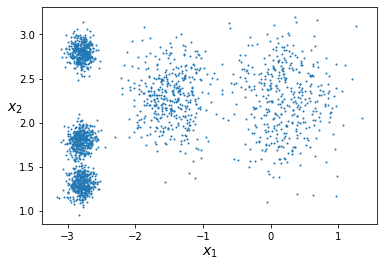

In [4]:
plot_clusters(X)
plt.show()

### K-Means

In [5]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [6]:
y_pred

array([0, 4, 1, ..., 2, 1, 4], dtype=int32)

In [7]:
kmeans.labels_

array([0, 4, 1, ..., 2, 1, 4], dtype=int32)

In [8]:
kmeans.cluster_centers_

array([[-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999]])

In [9]:
def plot_clusters_and_centroids(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                marker='o', s=10, linewidths=8,
                color='r', zorder=10, alpha=0.9)

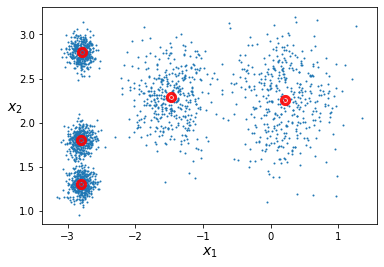

In [10]:
plot_clusters_and_centroids(X)
plt.show()

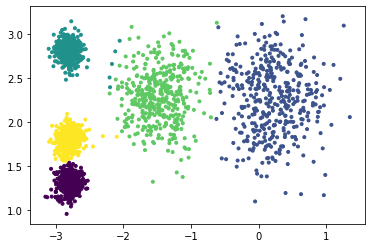

In [11]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, marker=".")

In [12]:
X_new = np.array([[0, 2], [-1, 1.5], [-3, 3], [-3, 2]])
kmeans.predict(X_new)

array([1, 3, 2, 4], dtype=int32)

In [13]:
kmeans.transform(X_new)

array([[2.88633901, 0.32995317, 2.9042344 , 1.49439034, 2.81093633],
       [1.81136018, 1.4254503 , 2.2125058 , 0.91403727, 1.82886597],
       [1.71086031, 3.29399768, 0.29040966, 1.69136631, 1.21475352],
       [0.7271137 , 3.21892023, 0.82289673, 1.55962398, 0.27925993]])

In [14]:
kmeans.inertia_

211.59853725816828

In [15]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

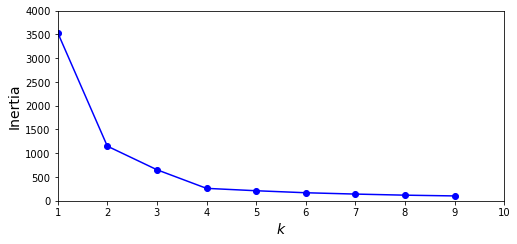

In [16]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 10, 0, 4000])
plt.show()

In [17]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [18]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

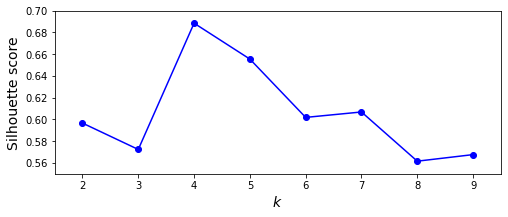

In [19]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.5, 9.5, 0.55, 0.7])
plt.show()

### DBSCAN

In [20]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [21]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.2)

In [22]:
dbscan.labels_[:15]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [23]:
np.unique(dbscan.labels_)

array([0, 1])

In [24]:
np.sum(dbscan.labels_ == -1)

0

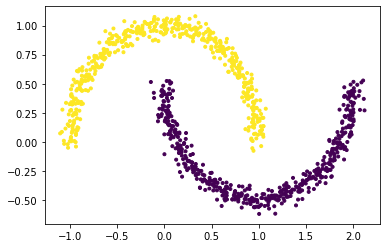

In [25]:
plt.scatter(X[:,0], X[:,1], c=dbscan.labels_, marker=".")

#### Predictions

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=10)

In [27]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])

In [28]:
knn.predict(X_new)

array([1, 0, 1, 0])

In [29]:
knn.predict_proba(X_new)

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

### Try DBSCN on the kmeans data

In [30]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

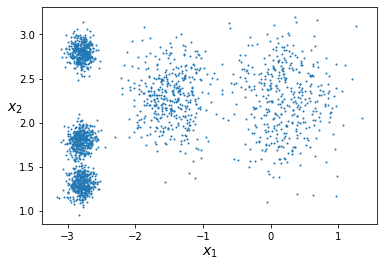

In [31]:
plot_clusters(X)
plt.show()

In [32]:
dbscan = DBSCAN(eps=0.15, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.15)

In [33]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3])

In [34]:
np.sum(dbscan.labels_ == -1)

42

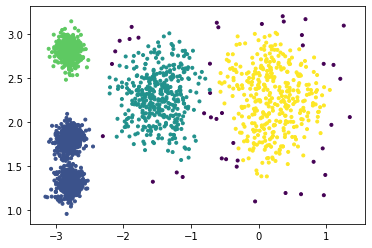

In [35]:
plt.scatter(X[:,0], X[:,1], c=dbscan.labels_, marker=".")

### Iris data

In [36]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

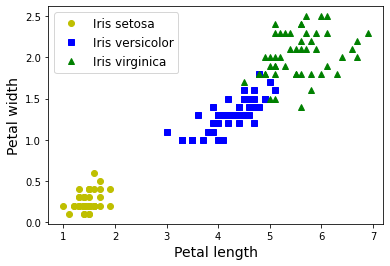

In [37]:
# Actual data...
#plt.figure(figsize=(9, 3.5))
#plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

#plt.subplot(122)
#plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
#plt.xlabel("Petal length", fontsize=14)
#plt.tick_params(labelleft=False)

plt.show()

#### Try kmeans - can experiment with various k

In [38]:
k = 3
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

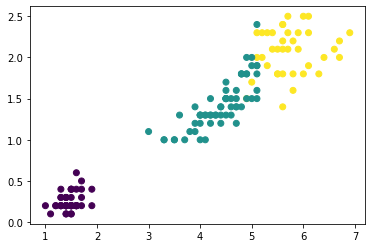

In [39]:
plt.scatter(X[:,2], X[:,3], c=y_pred)

In [40]:
dbscan = DBSCAN(eps=0.8, min_samples=3)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=3)

In [41]:
np.sum(dbscan.labels_ == -1)

2

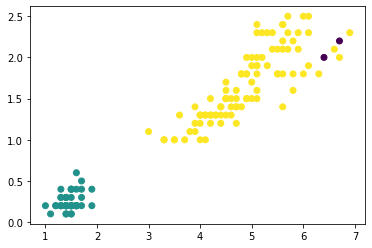

In [42]:
plt.scatter(X[:,2], X[:,3], c=dbscan.labels_)